In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
### lets read clean_data.csv

df=pd.read_csv('./movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.shape

(5043, 28)

In [5]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [8]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [10]:
df.dropna(axis=0, inplace=True)
df.shape

(3756, 28)

## Top 200 Movies based on IMDB and No. of Reviews

## Top Foreign Movies

In [30]:
foreign_movies = df[df['country'] != 'Canada']
top_foreign_movies = foreign_movies.sort_values(by='imdb_score', ascending=False)
top_foreign_movies=top_foreign_movies[['movie_title','country', 'imdb_score']]
top_foreign_movies.head(10)

,movie_title,country,imdb_score
1937,The Shawshank Redemption,USA,9.3
3466,The Godfather,USA,9.2
66,The Dark Knight,USA,9.0
2837,The Godfather: Part II,USA,9.0
339,The Lord of the Rings: The Return of the King,USA,8.9
4498,"The Good, the Bad and the Ugly",Italy,8.9
1874,Schindler's List,USA,8.9
3355,Pulp Fiction,USA,8.9
836,Forrest Gump,USA,8.8
270,The Lord of the Rings: The Fellowship of the R...,New Zealand,8.8


## Top 10 Directors

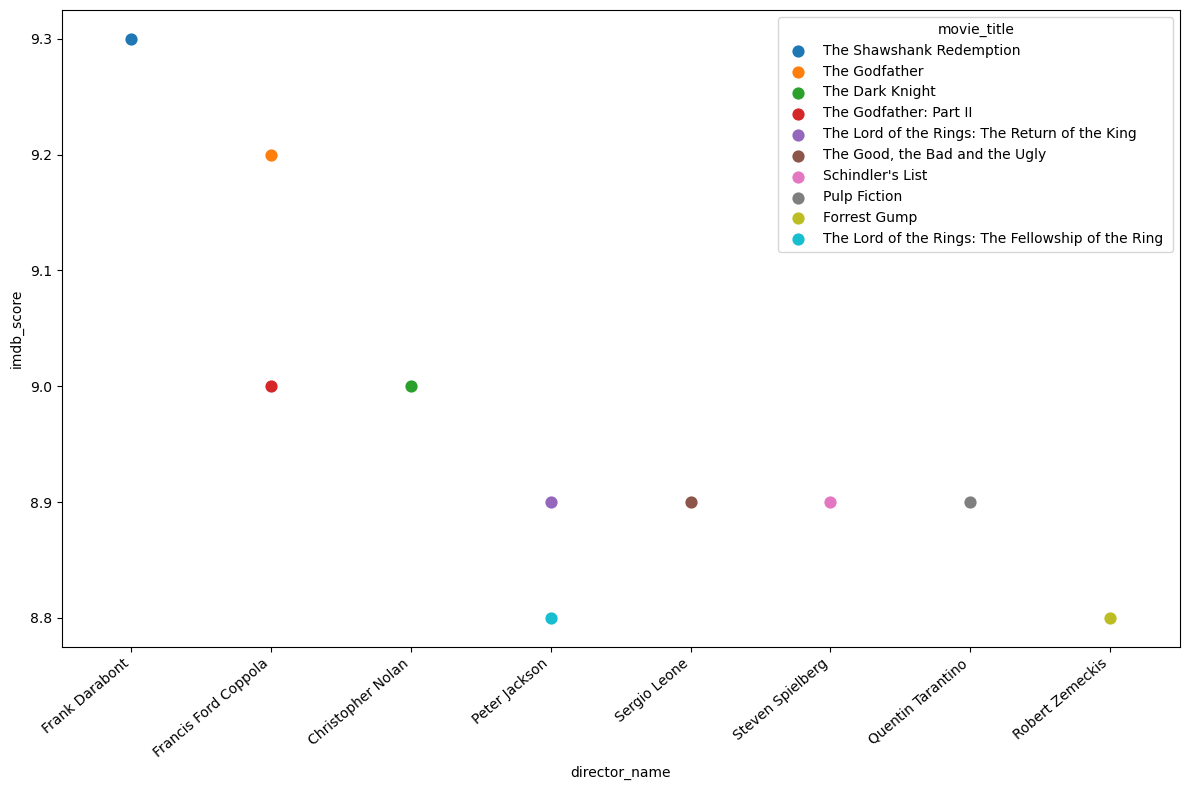

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df.sort_values(by='imdb_score', ascending=False)

df_top10 = df.head(10)

plt.figure(figsize=(12, 8))
ax = sns.pointplot(x='director_name', y='imdb_score', data=df_top10, hue='movie_title')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## Recommending Movies Based on Actors

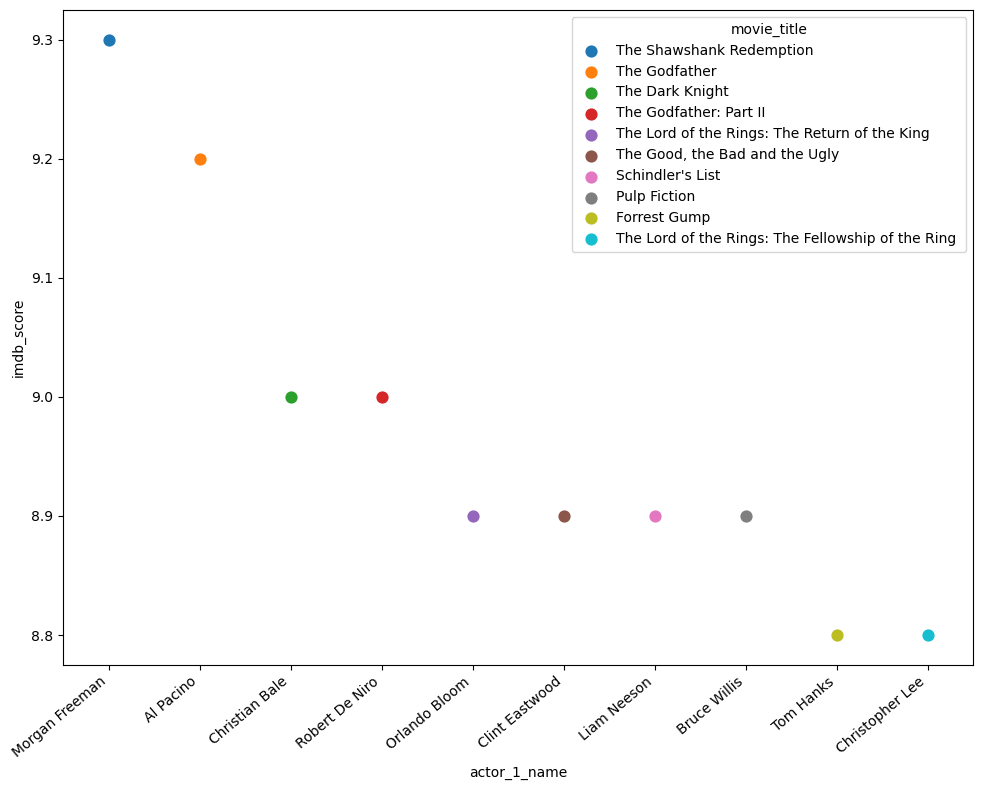

In [35]:
plt.figure(figsize=(10, 8))
df = df.sort_values(by='imdb_score', ascending=False)
df_new1 = df.head(10)

ax = sns.pointplot(x=df_new1['actor_1_name'], y=df_new1['imdb_score'], hue=df_new1['movie_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()